In [66]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 2

In [67]:
#stuff to do: write code to scan this string, and find conv, df, in, out of 2d
f = open("Resnet18.txt")
res_layers = []
for line in f:
    text = line.split()
    if len(text)>1 and (("Conv" in text[1])): # or ("Linear" in text[1])):
        #print(line)
        #in_chan, out_chan, k_size, stride
        if "Conv" in text[1]:
            in_chan = int(text[1].split('(')[1][:-1])
            #print(in_chan)
            out_chan = int(text[2][:-1])
            #print(out_chan)
            k_size = int(text[3].split('(')[1][:-1]) #assumes square kernel
            #print(k_size)
            stride =  int(text[5].split('(')[1][:-1])
            #print(stride)
        res_layers.append([in_chan,out_chan,k_size,stride])
res_layers.append([512,1000])
print(res_layers)

f2 = open("VGG11.txt")
vgg_layers = []
for line in f2:
    text = line.split()
    if len(text)>1 and (("Conv" in text[1])): # or ("Linear" in text[1])):
        #print(line)
        #in_chan, out_chan, k_size, stride
        if "Conv" in text[1]:
            in_chan = int(text[1].split('(')[1][:-1])
            #print(in_chan)
            out_chan = int(text[2][:-1])
            #print(out_chan)
            k_size = int(text[3].split('(')[1][:-1]) #assumes square kernel
            #print(k_size)
            stride =  int(text[5].split('(')[1][:-1])
            #print(stride)
        vgg_layers.append([in_chan,out_chan,k_size,stride])
vgg_layers.append([25088,4096])
vgg_layers.append([4096,4096])
vgg_layers.append([4096,1000])
print(vgg_layers)

"""
TODO: 
1) Do the same for above for VGG11! (Probs just copy paste and make a new array)
2) Calculate the Nl,Dl, Rla, Rlw
3) Finally do the compmutation in slide 7 here: https://courses.grainger.illinois.edu/ece498nsu/fa2020/secure/lectures/4-Finite-precision-DPs-2020-updated.pdf

"""

[[3, 64, 7, 2], [64, 64, 3, 1], [64, 64, 3, 1], [64, 64, 3, 1], [64, 64, 3, 1], [64, 128, 3, 2], [128, 128, 3, 1], [64, 128, 1, 2], [128, 128, 3, 1], [128, 128, 3, 1], [128, 256, 3, 2], [256, 256, 3, 1], [128, 256, 1, 2], [256, 256, 3, 1], [256, 256, 3, 1], [256, 512, 3, 2], [512, 512, 3, 1], [256, 512, 1, 2], [512, 512, 3, 1], [512, 512, 3, 1], [512, 1000]]
[[3, 64, 3, 1], [64, 128, 3, 1], [128, 256, 3, 1], [256, 256, 3, 1], [256, 512, 3, 1], [512, 512, 3, 1], [512, 512, 3, 1], [512, 512, 3, 1], [25088, 4096], [4096, 4096], [4096, 1000]]


'\nTODO: \n1) Do the same for above for VGG11! (Probs just copy paste and make a new array)\n2) Calculate the Nl,Dl, Rla, Rlw\n3) Finally do the compmutation in slide 7 here: https://courses.grainger.illinois.edu/ece498nsu/fa2020/secure/lectures/4-Finite-precision-DPs-2020-updated.pdf\n\n'

In [68]:
# for linear (numrow,numcols)
# Nl Number of Dot Products is image_size^2*out_chan/stride in conv and len(col) aka numrows in linear
# Dl dot product dim is kernalsize^2*in_chan and numcols in linear
# Rla number of activations = out_chan*img_size^2 so numrows in linear
# Rlw number of weightsRlw = k_size^2*in_chan*out_chan and numrows*numcols in linear

#this assumes 32x32x3 input
img_size = 32*32
for NN in [res_layers,vgg_layers]:
    CC, RC = 0, 0
    for l in NN:
        if len(l)==4: 
            #convolutional layer
            in_chan, out_chan, k_size, stride = l
            Nl = img_size * out_chan / stride
            Dl = k_size**2 * in_chan
            Rla = out_chan * img_size
            Rlw = k_size**2 * in_chan*out_chan
        else:
            #linear layer
            numrows, numcols = l
            Nl = numrows
            Dl = numcols
            Rla = numrows
            RLw = numrows*numcols
        CC += Nl * (Dl * 10 * 10 + (Dl - 1) * (10 + 10 + np.log2(Dl) - 1))
        RC += Rla * 10 + Rlw * 10
    if NN == res_layers: 
        print("Resnet18:")
    else:
        print("\nVGG11:")
    print("Computational Cost:","{:,}".format(CC) ,"\nRepresentational Cost:","{:,}".format(RC))


Resnet18:
Computational Cost: 1,379,091,858,245.5996 
Representational Cost: 184,419,200

VGG11:
Computational Cost: 1,251,552,292,824.7742 
Representational Cost: 191,469,440


## Problem 3 -- in nn_inference_release folder

In [69]:
#4.3 --> Write down gradient and update equation!
#3.1 you need dynamic ranges, then do quantization
#3.2 you need all four files
activation_dr= np.load("activation_dynamic_range.npy") 
#each index of the array corresponds to each layer and that will have maximum value given by
weight_dr=np.load("weight_dynamic_range.npy")
print(activation_dr)
print(weight_dr)

# 4 6 7, for any of the weights, put all weights in plot and give the numbers
"""4) Hints:
Plot the convergence curve means plot MSE convergence curve, and plot weights!
convergence around 3.1, conversion around -.7 or -.8
you will see many different values
pay attention to initialization! That will change result a lot.

if you use a lot of samples, it should match your analytic evaluation
"""

#p7 critical path delay, most amount of time you need to get to end. 

FileNotFoundError: [Errno 2] No such file or directory: 'activation_dynamic_range.npy'

In [70]:

def UniformLevels(r,m):
    #this will place levels at either end of r and uniformly between
    return np.arange(-r,r+r/m,2*r/(m-1))
    
print(np.array([.2])-UniformLevels(1,5))
print(np.zeros((5,2)))

[ 1.2  0.7  0.2 -0.3 -0.8]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


## Problem 4

In [127]:
w1,w2,w3 = np.random.rand(), np.random.rand(), np.random.rand()
n_samples = 10000
x1,x2 = 0,0
mu = .2

xs = np.zeros((n_samples,2))
for i in range(n_samples):
    angle = np.pi * np.random.uniform(0, 2)
    x1 = np.cos(angle)
    x2 = np.sin(angle)
    xs[i] = [x1,x2]


errors = []
weights = []

for x1,x2 in xs:
    #determine prediction
    y1_t = w1*x1 + w2*x2
    y1 = y1_t**2
    y2_t = w3*y1
    y2 = np.log(1+y2_t**2)
    
    #determine true value
    y = np.arctan2(x2,x1)
    
    #error
    errors.append((y-y2)**2)
    
    #update weights:
    w1 += -mu*8*(y2-y)*y1_t*w3*x1*2*y2_t/(1+y2_t**2)
    w2 += -mu*8*(y2-y)*y1_t*w3*x2*2*y2_t/(1+y2_t**2)
    w3 += -mu*4*y1*(y2-y)*2*y2_t/(1+y2_t**2)
    weights.append([w1,w2,w3])
    
#loop through xs,
#determine the xs and ys
#determine error

#print(errors)
print("Wegihts w1,w2,w3", w1,w2,w3)

# fig=plt.figure(figsize=(20,10))
# ax=fig.add_subplot(111)
# line1, = ax.plot(range(len(errors)), errors ,label='Prediction',linewidth=2,color='b',marker='o',markersize=10)
# line2, = ax.plot(BWs,SQNR_eval,label='Simulation',linewidth=2,color='r',marker='s',markersize=10)
# #plt.legend(handles=[line1],loc=0,fontsize=20)
# ax.grid()
# ax.set_title("Error convergence")
# ax.set_xlabel(r'Iterations',fontsize=20)
# ax.set_ylabel('Error',fontsize=20)
# ax.tick_params(axis='both',labelsize=15)
# #ax.set_xticks(np.arange(1,20,2))
# plt.show()

print("Final MSE Error:", errors[-1])

Wegihts w1,w2,w3 -0.11024429611087815 -0.1498543605722989 0.0005167034825870353
Final MSE Error: 1.1880123298148146


In [128]:
print("Wegihts w1,w2,w3", w1,w2,w3)
print("Final MSE Error:", errors[-1])
print("Average MSE Error of last 5000 iterations:",sum(errors[-5000:])/5000 )

Wegihts w1,w2,w3 -0.11024429611087815 -0.1498543605722989 0.0005167034825870353
Final MSE Error: 1.1880123298148146
Average MSE Error of last 5000 iterations: 3.290079627615272


3.316446293977659


Text(0,0.5,'Weights')

<Figure size 432x288 with 0 Axes>

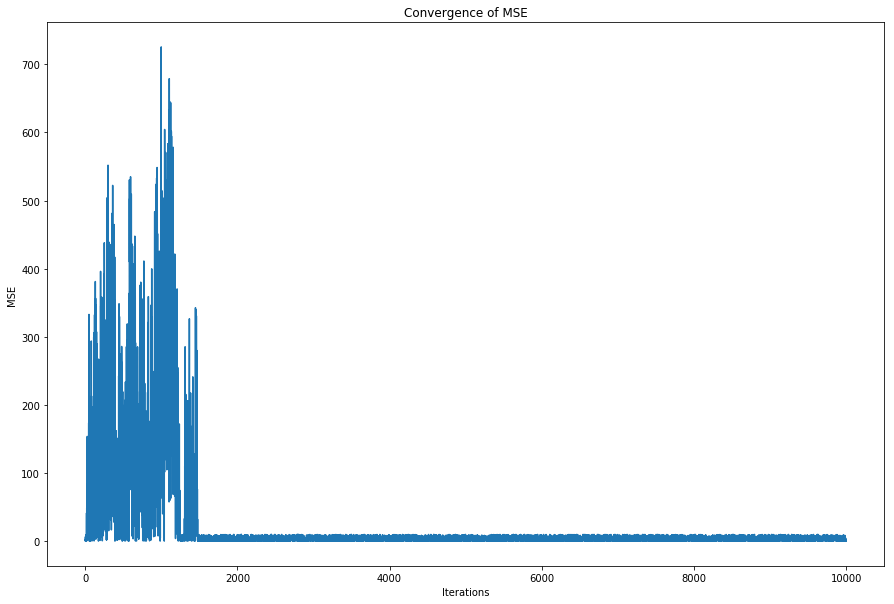

<Figure size 432x288 with 0 Axes>

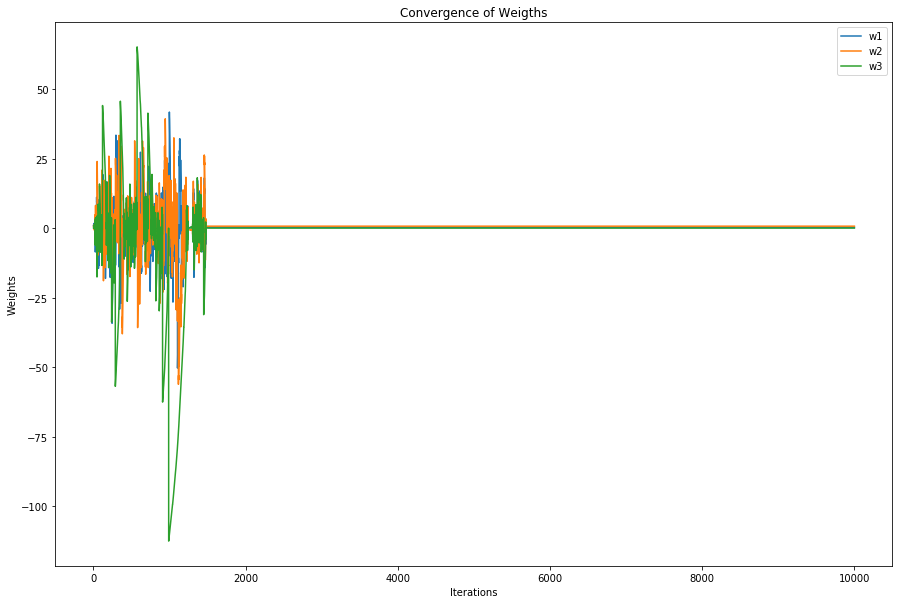

In [124]:
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(range(len(errors)), errors)
plt.title("Convergence of MSE")
plt.xlabel("Iterations")
plt.ylabel("MSE")
print(sum(errors[-5000:])/5000)

#print(errors[-500:])
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(range(len(weights)), weights)
plt.legend(["w1","w2","w3"])
plt.title("Convergence of Weigths")
plt.xlabel("Iterations")
plt.ylabel("Weights")


## Question 6 (lecture 6 as well!)

In [324]:
#note 3 tap means 3 previous values
n_sample = 50000

gn = [np.random.normal(),np.random.normal(),np.random.normal()]
data = []
for idx in range(3,n_sample+3):
    g = np.random.normal()
    gn.append(g)
    data.append(.1*g+.5*gn[idx-1]-.5*gn[idx-2]+.1*gn[idx-3]) # x_[n] = u_[n] + 0.8*x_[n-1]

X = []
y = []
for three_sample_before, two_sample_before, one_sample_before, curr in zip(data[0:-3:], data[1:-2:], data[2:-1:],data[3::]):
    vector1 = np.array([one_sample_before, two_sample_before, three_sample_before]) 
    vector2 = np.array([curr, one_sample_before, two_sample_before]) # for R
    X.append(vector1)
    y.append(curr)

X = np.vstack(X)
y = np.array(y)

Mu 0.0
Last weight Ensemble: [8.78053722 0.02969244 6.10250799]
last error Ensemble: 59.817875177118665
Mu 0.01
Last weight Ensemble: [4.14569177 3.92470251 5.38141252]
last error Ensemble: 13.736687065421911
Mu 0.02
Last weight Ensemble: [4.31065491 1.97064562 1.21324596]
last error Ensemble: 8.274058043391287
Mu 0.03
Last weight Ensemble: [1.9446605  3.25089109 2.76148328]
last error Ensemble: 4.189039525378309
Mu 0.04
Last weight Ensemble: [0.0963407  0.54062974 0.57519328]
last error Ensemble: 0.5451323067138197
Mu 0.05
Last weight Ensemble: [1.5712235  1.78784043 1.73763172]
last error Ensemble: 2.295756132552158
Mu 0.06
Last weight Ensemble: [2.65635533 3.24816534 2.52790564]
last error Ensemble: 4.767503360534031
Mu 0.07
Last weight Ensemble: [1.43275814 1.844474   1.56874478]
last error Ensemble: 2.043460576265776
Mu 0.08
Last weight Ensemble: [0.54743246 0.73127262 0.60334013]
last error Ensemble: 0.7836936376838285
Mu 0.09
Last weight Ensemble: [0.63103958 1.02196553 0.964253

Mu 0.76
Last weight Ensemble: [-0.71915913 -0.41108827 -0.17144687]
last error Ensemble: 0.31294450878117347
Mu 0.77
Last weight Ensemble: [-0.71921513 -0.41043627 -0.17082638]
last error Ensemble: 0.3128973009108874
Mu 0.78
Last weight Ensemble: [-0.71927314 -0.40981031 -0.17023467]
last error Ensemble: 0.31285276684717334
Mu 0.79
Last weight Ensemble: [-0.71931885 -0.40918846 -0.16965704]
last error Ensemble: 0.31280936441528817
Mu 0.8
Last weight Ensemble: [-0.71929793 -0.40848982 -0.16904001]
last error Ensemble: 0.31276157745761524
Mu 0.81
Last weight Ensemble: [-0.7192653  -0.40779452 -0.1684361 ]
last error Ensemble: 0.31271486252923814
Mu 0.8200000000000001
Last weight Ensemble: [-0.71920012 -0.4070711  -0.1678244 ]
last error Ensemble: 0.3126670817948644
Mu 0.8300000000000001
Last weight Ensemble: [-0.71910202 -0.40631828 -0.16720382]
last error Ensemble: 0.31261815642301527
Mu 0.84
Last weight Ensemble: [-0.71898829 -0.40556092 -0.16659053]
last error Ensemble: 0.312569746994

Mu 1.51
Last weight Ensemble: [-0.68341993 -0.33923262 -0.12894037]
last error Ensemble: 0.3099127934662127
Mu 1.52
Last weight Ensemble: [-0.68274692 -0.33828071 -0.12850383]
last error Ensemble: 0.3098933261394432
Mu 1.53
Last weight Ensemble: [-0.68207437 -0.33733419 -0.12807187]
last error Ensemble: 0.30987449688449403
Mu 1.54
Last weight Ensemble: [-0.68140242 -0.3363932  -0.12764455]
last error Ensemble: 0.30985630255613916
Mu 1.55
Last weight Ensemble: [-0.6807311  -0.33545769 -0.12722178]
last error Ensemble: 0.30983873418311747
Mu 1.56
Last weight Ensemble: [-0.6800604  -0.33452757 -0.12680347]
last error Ensemble: 0.30982178075117456
Mu 1.57
Last weight Ensemble: [-0.6793906  -0.33360318 -0.1263898 ]
last error Ensemble: 0.30980544589403164
Mu 1.58
Last weight Ensemble: [-0.67872173 -0.33268447 -0.1259807 ]
last error Ensemble: 0.30978972038549907
Mu 1.59
Last weight Ensemble: [-0.67805375 -0.33177131 -0.12557604]
last error Ensemble: 0.30977459273875263
Mu 1.6
Last weight En

Mu 2.2600000000000002
Last weight Ensemble: [-0.63811118 -0.28394015 -0.10787844]
last error Ensemble: 0.3097957156007311
Mu 2.27
Last weight Ensemble: [-0.63735933 -0.28304569 -0.10749191]
last error Ensemble: 0.3098047666453198
Mu 2.2800000000000002
Last weight Ensemble: [-0.63638272 -0.28181771 -0.10688308]
last error Ensemble: 0.30981259157739155
Mu 2.29
Last weight Ensemble: [-0.63631009 -0.28193385 -0.10716886]
last error Ensemble: 0.3098274590772724
Mu 2.3000000000000003
Last weight Ensemble: [-0.63405733 -0.27881017 -0.10529724]
last error Ensemble: 0.30982875132308024
Mu 2.31
Last weight Ensemble: [-0.63553332 -0.28122881 -0.10711577]
last error Ensemble: 0.3098527664677143
Mu 2.32
Last weight Ensemble: [-0.6336166  -0.2786055  -0.10557665]
last error Ensemble: 0.3098567825006122
Mu 2.33
Last weight Ensemble: [-0.63375158 -0.27903181 -0.10606815]
last error Ensemble: 0.3098726465287474
Mu 2.34
Last weight Ensemble: [-0.63259839 -0.27754403 -0.1052846 ]
last error Ensemble: 0.3

Mu 3.0100000000000002
Last weight Ensemble: [0.29355202 1.0828511  0.79183096]
last error Ensemble: 0.8014715557790878
Mu 3.02
Last weight Ensemble: [-0.29647204  0.20660093  0.20522426]
last error Ensemble: 0.37192467134182977
Mu 3.0300000000000002
Last weight Ensemble: [0.21012421 0.95857341 0.70838049]
last error Ensemble: 0.7155441688491442
Mu 3.04
Last weight Ensemble: [0.69897034 1.68419029 1.19395684]
last error Ensemble: 1.3342382382287874
Mu 3.0500000000000003
Last weight Ensemble: [-0.69962264 -0.39258217 -0.19639033]
last error Ensemble: 0.3149789860291836
Mu 3.06
Last weight Ensemble: [-0.28194046  0.22737562  0.21845539]
last error Ensemble: 0.3773947594457405
Mu 3.0700000000000003
Last weight Ensemble: [0.90074282 1.98317381 1.39380118]
last error Ensemble: 1.671261301395608
Mu 3.08
Last weight Ensemble: [-0.50312308 -0.10142159 -0.00202446]
last error Ensemble: 0.3186928946128636
Mu 3.09
Last weight Ensemble: [0.40053897 1.24010043 0.89605671]
last error Ensemble: 0.9221

Mu 3.7600000000000002
Last weight Ensemble: [30753.12992924 45690.04135795 30688.80880207]
last error Ensemble: 559778506.7188786
Mu 3.77
Last weight Ensemble: [48143.71686063 71528.0599502  48045.01590987]
last error Ensemble: 1371916180.3731723
Mu 3.7800000000000002
Last weight Ensemble: [ 74941.04165528 111342.7748836   74790.64472075]
last error Ensemble: 3324305271.8170404
Mu 3.79
Last weight Ensemble: [ 68966.95868189 102468.53992164  68831.80343778]
last error Ensemble: 2815537227.028857
Mu 3.8000000000000003
Last weight Ensemble: [30216.73065852 44895.97584391 30159.18546257]
last error Ensemble: 540506584.8498256
Mu 3.81
Last weight Ensemble: [121282.93449393 180203.04695383 121056.11109477]
last error Ensemble: 8707820502.407387
Mu 3.8200000000000003
Last weight Ensemble: [203277.9732066  302036.41881507 202906.80798441]
last error Ensemble: 24462798825.808884
Mu 3.83
Last weight Ensemble: [25489.84946596 37874.75787406 25444.89017147]
last error Ensemble: 384676225.89724004


Mu 4.43
Last weight Ensemble: [1.14887212e+09 1.70918270e+09 1.14939378e+09]
last error Ensemble: 7.833092018431521e+17
Mu 4.44
Last weight Ensemble: [-1.40294053e+08 -2.08721215e+08 -1.40361816e+08]
last error Ensemble: 1.1681156836062952e+16
Mu 4.45
Last weight Ensemble: [-9.41633189e+07 -1.40094043e+08 -9.42115019e+07]
last error Ensemble: 5262454274435475.0
Mu 4.46
Last weight Ensemble: [5.06597567e+08 7.53722777e+08 5.06871199e+08]
last error Ensemble: 1.523240621746628e+17
Mu 4.47
Last weight Ensemble: [1.03180126e+09 1.53516571e+09 1.03238765e+09]
last error Ensemble: 6.319051583429686e+17
Mu 4.48
Last weight Ensemble: [2.02249074e+09 3.00923748e+09 2.02369664e+09]
last error Ensemble: 2.428009381053171e+18
Mu 4.49
Last weight Ensemble: [1.87614699e+09 2.79156365e+09 1.87731754e+09]
last error Ensemble: 2.0894331133167304e+18
Mu 4.5
Last weight Ensemble: [2.11986477e+09 3.15427556e+09 2.12124552e+09]
last error Ensemble: 2.6676481252482033e+18
Mu 4.51
Last weight Ensemble: [3.14

Mu 5.1000000000000005
Last weight Ensemble: [5.27204402e+10 7.85760986e+10 5.28194496e+10]
last error Ensemble: 1.6539209159021258e+21
Mu 5.11
Last weight Ensemble: [-1.80591200e+10 -2.69166555e+10 -1.80932896e+10]
last error Ensemble: 1.940739256219797e+20
Mu 5.12
Last weight Ensemble: [-1.30498744e+11 -1.94510904e+11 -1.30747474e+11]
last error Ensemble: 1.0134539523139922e+22
Mu 5.13
Last weight Ensemble: [-1.46109687e+11 -2.17785904e+11 -1.46390173e+11]
last error Ensemble: 1.2704767000807148e+22
Mu 5.14
Last weight Ensemble: [-1.36776894e+11 -2.03880955e+11 -1.37041312e+11]
last error Ensemble: 1.1134006728649995e+22
Mu 5.15
Last weight Ensemble: [-4.04723539e+10 -6.03303141e+10 -4.05511345e+10]
last error Ensemble: 9.749004162822401e+20
Mu 5.16
Last weight Ensemble: [-1.56389560e+11 -2.33129970e+11 -1.56696031e+11]
last error Ensemble: 1.455714340687377e+22
Mu 5.17
Last weight Ensemble: [5.30953572e+10 7.91516830e+10 5.32000932e+10]
last error Ensemble: 1.6779964899254193e+21
Mu 

Mu 5.7700000000000005
Last weight Ensemble: [1.62892759e+16 2.43300128e+16 1.63285245e+16]
last error Ensemble: 1.5830696518678835e+32
Mu 5.78
Last weight Ensemble: [1.25973851e+16 1.88163499e+16 1.26277580e+16]
last error Ensemble: 9.46833612807566e+31
Mu 5.79
Last weight Ensemble: [1.87669531e+16 2.80325858e+16 1.88122270e+16]
last error Ensemble: 2.1014387920302458e+32
Mu 5.8
Last weight Ensemble: [1.34342016e+16 2.00676113e+16 1.34666266e+16]
last error Ensemble: 1.0768848296081599e+32
Mu 5.8100000000000005
Last weight Ensemble: [5.92037130e+16 8.84396867e+16 5.93466666e+16]
last error Ensemble: 2.0915089254810435e+33
Mu 5.82
Last weight Ensemble: [4.63159128e+16 6.91899341e+16 4.64277844e+16]
last error Ensemble: 1.2800842492125057e+33
Mu 5.83
Last weight Ensemble: [4.42776249e+16 6.61471975e+16 4.43845998e+16]
last error Ensemble: 1.1699383171711529e+33
Mu 5.84
Last weight Ensemble: [-2.38137099e+16 -3.55769439e+16 -2.38712536e+16]
last error Ensemble: 3.384267248398323e+32
Mu 5.

Text(0,0.5,'Weights')

<Figure size 432x288 with 0 Axes>

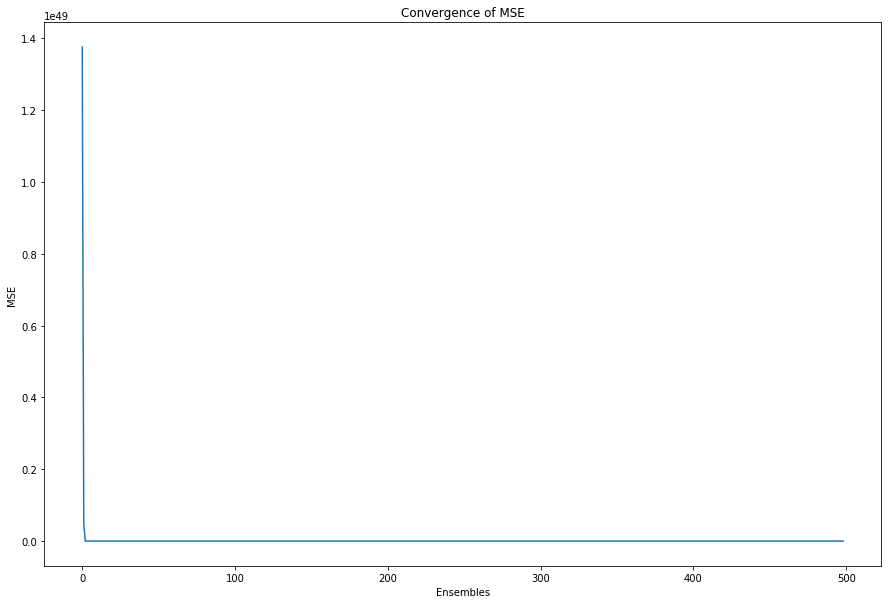

<Figure size 432x288 with 0 Axes>

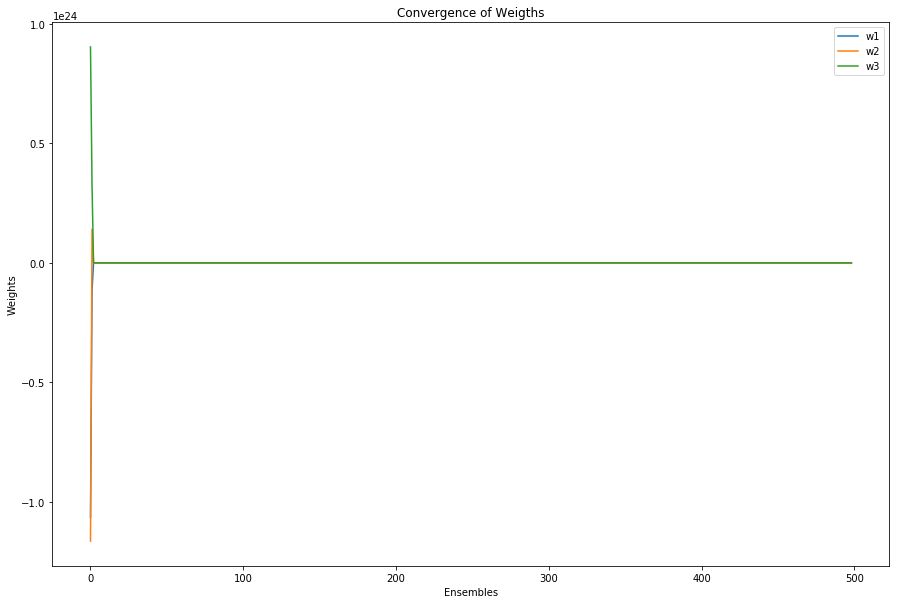

In [327]:
for mu_start in np.arange(0,6.01,.01):
    w = np.random.rand(3)*10
    #print(w)
    errors = []
    weights = []
    mu =  mu_start#1.28*50 #.5mu, .01mu, 50mu
    w_ensemble = []
    er_ensemble = []
    ensemble_size = 100
    for idx, x in enumerate(X):
        mu = mu/2.0 if idx%50==0 else mu
        #determine prediction
       # print("X,w,x_hat",x,w,x_hat)
        x_hat = np.dot(w,x)

        #find error
        errors.append((x_hat-y[idx])**2)
        if len(errors)%ensemble_size==0 and len(errors)>0:
            er_ensemble.append(np.sum(np.array(errors[-ensemble_size:]),axis=0)/ensemble_size)

        #update weights
        w += -mu*2*(x_hat-y[idx])*x
        #print("y,w",y[idx],w)
        #print(w)
        weights.append(np.array(w))
        if len(weights)%ensemble_size==0 and len(weights)>0:
            w_ensemble.append(np.sum(np.array(weights[-ensemble_size:]),axis=0)/ensemble_size)

    print("Mu",mu_start)
    print("Last weight Ensemble:",w_ensemble[-1])
    print("last error Ensemble:",er_ensemble[-1])

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(range(len(er_ensemble)), er_ensemble)
plt.title("Convergence of MSE")
plt.xlabel("Ensembles")
plt.ylabel("MSE")

#print(errors[-500:])
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(w_ensemble)
plt.legend(["w1","w2","w3"])
plt.title("Convergence of Weigths")
plt.xlabel("Ensembles")
plt.ylabel("Weights")

In [273]:
x = [[1,2,4],[4,3,3]]
np.sum(x,axis=0)
y = [1,2,4,5,6,7]
y[-5]

2

## Problem 7*:

In [281]:
#note 3 tap means 3 previous values
n_sample = 50000

gn = [np.random.normal(),np.random.normal(),np.random.normal()]
data = []
for idx in range(3,n_sample+3):
    g = np.random.normal()
    gn.append(g)
    data.append(.1*g+.5*gn[idx-1]-.5*gn[idx-2]+.1*gn[idx-3]) # x_[n] = u_[n] + 0.8*x_[n-1]

X = []
y = []
for three_sample_before, two_sample_before, one_sample_before, curr in zip(data[0:-3:], data[1:-2:], data[2:-1:],data[3::]):
    vector1 = np.array([one_sample_before, two_sample_before, three_sample_before]) 
    vector2 = np.array([curr, one_sample_before, two_sample_before]) # for R
    X.append(vector1)
    y.append(curr)

X = np.vstack(X)
y = np.array(y)

mu 0.0
Last weight Ensemble: [2.85812775 5.29577777 9.83032934]
last error Ensemble: 37.074216477247504
mu 0.01
Last weight Ensemble: [2.98940633 4.56749413 6.21096812]
last error Ensemble: 16.675788723068138
mu 0.02
Last weight Ensemble: [2.04367376 4.8753821  4.72923255]
last error Ensemble: 11.47560842069364
mu 0.03
Last weight Ensemble: [1.14888558 2.34159628 1.45762795]
last error Ensemble: 2.6459629118529886
mu 0.04
Last weight Ensemble: [2.451744   3.68981215 2.5022716 ]
last error Ensemble: 6.181964000219007
mu 0.05
Last weight Ensemble: [2.35597128 4.11614097 3.05806402]
last error Ensemble: 7.299800961914513
mu 0.06
Last weight Ensemble: [1.82453265 3.09064987 2.08307702]
last error Ensemble: 4.377837039080677
mu 0.07
Last weight Ensemble: [1.18548388 2.3089269  1.66531224]
last error Ensemble: 2.7254244737612954
mu 0.08
Last weight Ensemble: [0.80292591 1.69827274 1.20016492]
last error Ensemble: 1.7352358270706711
mu 0.09
Last weight Ensemble: [0.57371082 1.3813781  1.00265

mu 0.76
Last weight Ensemble: [-0.87171997 -0.66360616 -0.36011484]
last error Ensemble: 0.4218698413659249
mu 0.77
Last weight Ensemble: [-0.81285298 -0.57772633 -0.30059945]
last error Ensemble: 0.3999996606200451
mu 0.78
Last weight Ensemble: [-0.84194933 -0.61867318 -0.32841018]
last error Ensemble: 0.4098646269647048
mu 0.79
Last weight Ensemble: [-0.90263609 -0.7050548  -0.38724651]
last error Ensemble: 0.43455058693585336
mu 0.8
Last weight Ensemble: [-0.96946501 -0.80018661 -0.451842  ]
last error Ensemble: 0.4679152044328323
mu 0.81
Last weight Ensemble: [-0.84450325 -0.61950236 -0.32792872]
last error Ensemble: 0.4102663520066028
mu 0.8200000000000001
Last weight Ensemble: [-0.9930857  -0.83209208 -0.47242391]
last error Ensemble: 0.48065467733964157
mu 0.8300000000000001
Last weight Ensemble: [-0.81644796 -0.57745651 -0.29868864]
last error Ensemble: 0.4003046638188228
mu 0.84
Last weight Ensemble: [-0.74734207 -0.47752797 -0.23066958]
last error Ensemble: 0.3814607907035155

mu 1.51
Last weight Ensemble: [ -69.73851879 -103.41515203  -70.63980271]
last error Ensemble: 3748.4520927126578
mu 1.52
Last weight Ensemble: [-14.73701344 -21.30663587 -14.4582125 ]
last error Ensemble: 156.39572553400546
mu 1.53
Last weight Ensemble: [-110.48550413 -163.95275949 -111.82029289]
last error Ensemble: 9436.629973287758
mu 1.54
Last weight Ensemble: [-39.10944829 -57.56966755 -39.1683755 ]
last error Ensemble: 1156.9526748233172
mu 1.55
Last weight Ensemble: [-105.9323004  -156.96513157 -106.87220897]
last error Ensemble: 8646.70855758596
mu 1.56
Last weight Ensemble: [ -9.1276008  -12.90881102  -8.69153799]
last error Ensemble: 56.71253247984084
mu 1.57
Last weight Ensemble: [19.84349868 30.15930043 20.621185  ]
last error Ensemble: 326.065683131656
mu 1.58
Last weight Ensemble: [-129.56627503 -191.82719043 -130.34950538]
last error Ensemble: 12918.447956048361
mu 1.59
Last weight Ensemble: [-48.14046295 -70.82456532 -48.0341328 ]
last error Ensemble: 1753.087862795612

mu 2.23
Last weight Ensemble: [-15173.51630233 -22601.6371189  -15249.10139434]
last error Ensemble: 179014778.03612098
mu 2.24
Last weight Ensemble: [-54965.32626836 -81873.48702314 -55228.89284814]
last error Ensemble: 2348939199.451411
mu 2.25
Last weight Ensemble: [-47.21478345 -70.11339264 -47.49528664]
last error Ensemble: 1710.219379726504
mu 2.2600000000000002
Last weight Ensemble: [-5879.73670688 -8757.75314795 -5905.70316159]
last error Ensemble: 26871158.753558427
mu 2.27
Last weight Ensemble: [-32875.88007409 -48966.89705083 -33012.50230762]
last error Ensemble: 840035194.5550672
mu 2.2800000000000002
Last weight Ensemble: [50069.06717944 74572.70543102 50264.57629728]
last error Ensemble: 1948185625.279899
mu 2.29
Last weight Ensemble: [ -97844.25734583 -145723.69720796  -98204.31887512]
last error Ensemble: 7438701384.620039
mu 2.3000000000000003
Last weight Ensemble: [-19385.69136966 -28870.98977145 -19452.87561581]
last error Ensemble: 291961052.3346584
mu 2.31
Last wei

mu 2.9
Last weight Ensemble: [11532526.71741936 17192054.32500317 11509146.98081423]
last error Ensemble: 103214845103673.92
mu 2.91
Last weight Ensemble: [ -9006653.65071155 -13427106.85298117  -8988203.84173263]
last error Ensemble: 62955662167341.16
mu 2.92
Last weight Ensemble: [2056059.88828659 3065334.80525138 2051877.65602083]
last error Ensemble: 3281022923110.759
mu 2.93
Last weight Ensemble: [-40390176.25657941 -60217441.91201625 -40305157.56695034]
last error Ensemble: 1266140337197919.2
mu 2.94
Last weight Ensemble: [-2910250.29978484 -4338988.44791788 -2904018.38366938]
last error Ensemble: 6573522988994.626
mu 2.95
Last weight Ensemble: [3878414.25081716 5782732.97934486 3870136.09856085]
last error Ensemble: 11675397367683.16
mu 2.96
Last weight Ensemble: [-1.52684002e+08 -2.27661104e+08 -1.52356274e+08]
last error Ensemble: 1.809536732118172e+16
mu 2.97
Last weight Ensemble: [33098195.62501701 49353159.95564833 33026635.05577565]
last error Ensemble: 850362821672545.8
m

mu 3.56
Last weight Ensemble: [2.37706966e+11 3.55190730e+11 2.37508349e+11]
last error Ensemble: 4.399285582418337e+22
mu 3.5700000000000003
Last weight Ensemble: [-3.91355485e+11 -5.84800037e+11 -3.91053703e+11]
last error Ensemble: 1.1925363632836586e+23
mu 3.58
Last weight Ensemble: [1.63237131e+11 2.43933352e+11 1.63121989e+11]
last error Ensemble: 2.074900984563597e+22
mu 3.59
Last weight Ensemble: [-7.67191253e+11 -1.14649494e+12 -7.66701544e+11]
last error Ensemble: 4.5835046786431876e+23
mu 3.6
Last weight Ensemble: [5.05796094e+11 7.55892861e+11 5.05507802e+11]
last error Ensemble: 1.9923814527607476e+23
mu 3.61
Last weight Ensemble: [6.23159854e+11 9.31323392e+11 6.22848042e+11]
last error Ensemble: 3.024487943134286e+23
mu 3.62
Last weight Ensemble: [-4.24533441e+11 -6.34496481e+11 -4.24351096e+11]
last error Ensemble: 1.403809979710688e+23
mu 3.63
Last weight Ensemble: [4.90180691e+10 7.32638565e+10 4.90005497e+10]
last error Ensemble: 1.8716675931283147e+21
mu 3.64
Last w

mu 4.23
Last weight Ensemble: [1.08532486e+14 1.62507401e+14 1.09120602e+14]
last error Ensemble: 9.216603057512897e+27
mu 4.24
Last weight Ensemble: [1.45324931e+14 2.17600585e+14 1.46127809e+14]
last error Ensemble: 1.652563124994759e+28
mu 4.25
Last weight Ensemble: [-3.94968710e+13 -5.91410247e+13 -3.97192556e+13]
last error Ensemble: 1.2207569684727756e+27
mu 4.26
Last weight Ensemble: [1.56708490e+13 2.34652174e+13 1.57607366e+13]
last error Ensemble: 1.9218279271169517e+26
mu 4.2700000000000005
Last weight Ensemble: [-1.78823485e+14 -2.67770159e+14 -1.79868036e+14]
last error Ensemble: 2.50267085201541e+28
mu 4.28
Last weight Ensemble: [1.39765263e+14 2.09286928e+14 1.40596344e+14]
last error Ensemble: 1.5288957357892948e+28
mu 4.29
Last weight Ensemble: [-1.85342819e+14 -2.77538677e+14 -1.86464326e+14]
last error Ensemble: 2.688779587082777e+28
mu 4.3
Last weight Ensemble: [-1.75027089e+14 -2.62094296e+14 -1.76104450e+14]
last error Ensemble: 2.397938602122622e+28
mu 4.31000000

mu 4.9
Last weight Ensemble: [6.28930309e+15 9.40299867e+15 6.35343077e+15]
last error Ensemble: 3.095624426406706e+31
mu 4.91
Last weight Ensemble: [3.24643487e+15 4.85326008e+15 3.27948164e+15]
last error Ensemble: 8.247274574063437e+30
mu 4.92
Last weight Ensemble: [2.89186594e+15 4.32281465e+15 2.92123803e+15]
last error Ensemble: 6.543416064714139e+30
mu 4.93
Last weight Ensemble: [-3.27685280e+14 -4.89785014e+14 -3.31004149e+14]
last error Ensemble: 8.400602771755724e+28
mu 4.94
Last weight Ensemble: [2.47948190e+15 3.70568100e+15 2.50450794e+15]
last error Ensemble: 4.8091004753892724e+30
mu 4.95
Last weight Ensemble: [3.35534946e+15 5.01420108e+15 3.38907619e+15]
last error Ensemble: 8.805616671047247e+30
mu 4.96
Last weight Ensemble: [5.60542724e+15 8.37583073e+15 5.66149794e+15]
last error Ensemble: 2.4572012429179406e+31
mu 4.97
Last weight Ensemble: [5.13329606e+15 7.66953207e+15 5.18435554e+15]
last error Ensemble: 2.0603997900426677e+31
mu 4.98
Last weight Ensemble: [5.49

mu 5.57
Last weight Ensemble: [2.28321884e+16 3.40337213e+16 2.32252178e+16]
last error Ensemble: 4.077675937204628e+32
mu 5.58
Last weight Ensemble: [-9.80531422e+16 -1.46123217e+17 -9.97143963e+16]
last error Ensemble: 7.517454369783885e+33
mu 5.59
Last weight Ensemble: [7.54693756e+16 1.12441668e+17 7.67286860e+16]
last error Ensemble: 4.451698562660159e+33
mu 5.6000000000000005
Last weight Ensemble: [-1.95019042e+17 -2.90492574e+17 -1.98225986e+17]
last error Ensemble: 2.97153201108173e+34
mu 5.61
Last weight Ensemble: [1.06204126e+17 1.58162409e+17 1.07926175e+17]
last error Ensemble: 8.809602896900139e+33
mu 5.62
Last weight Ensemble: [-3.15298783e+17 -4.69450903e+17 -3.20342308e+17]
last error Ensemble: 7.761932660621949e+34
mu 5.63
Last weight Ensemble: [-1.22989420e+17 -1.83081116e+17 -1.24931132e+17]
last error Ensemble: 1.1806375954218324e+34
mu 5.64
Last weight Ensemble: [-8.60378603e+16 -1.28048658e+17 -8.73790567e+16]
last error Ensemble: 5.77590196025704e+33
mu 5.65
Last

Text(0,0.5,'Weights')

<Figure size 432x288 with 0 Axes>

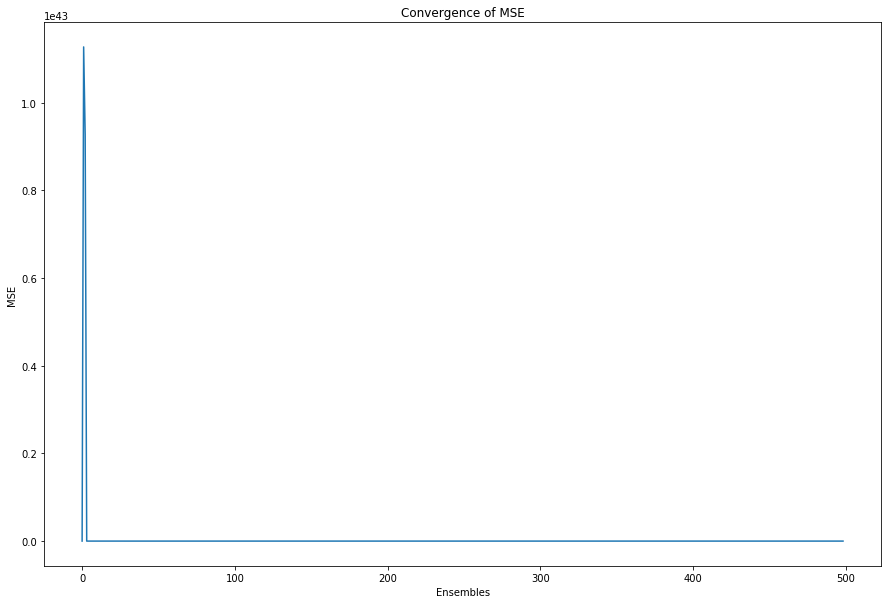

<Figure size 432x288 with 0 Axes>

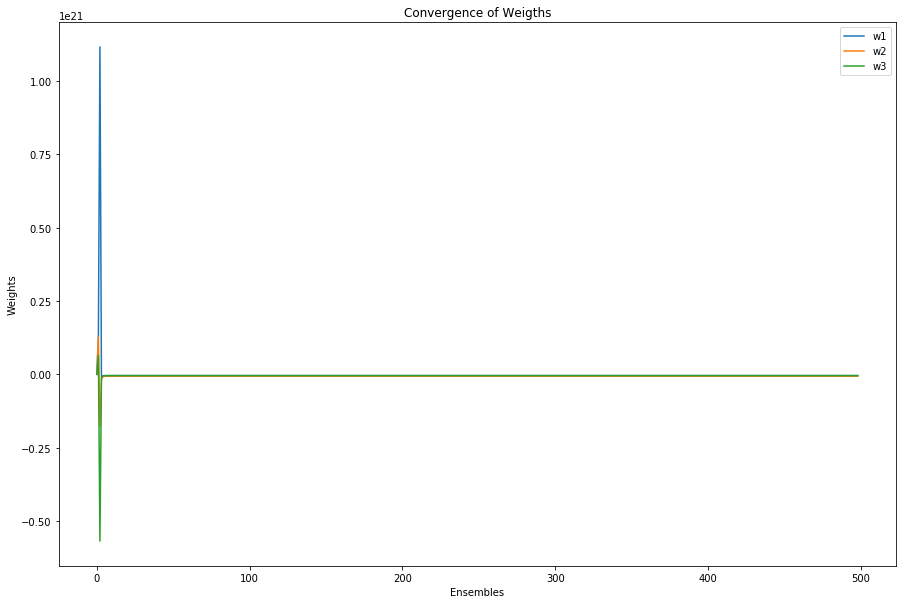

In [285]:
for mu_start in np.arange(0,6.01,.01):
    w = np.random.rand(3)*10
    #print(w)
    errors = []
    weights = []
    mu = mu_start #.5mu, .01mu, 50mu
    w_ensemble = []
    er_ensemble = []
    grads = []
    ensemble_size = 100

    for idx, x in enumerate(X):
        mu = mu/2.0 if idx%50==0 else mu
        #determine prediction
       # print("X,w,x_hat",x,w,x_hat)
        x_hat = np.dot(w,x)

        #find error
        errors.append((x_hat-y[idx])**2)
        if len(errors)%ensemble_size==0 and len(errors)>0:
            er_ensemble.append(np.sum(np.array(errors[-ensemble_size:]),axis=0)/ensemble_size)

        #update weights
        grads.append((x_hat-y[idx])*x)
        if idx>4:
            w += -mu*2*grads[-5]
        #print("y,w",y[idx],w)
        #print(w)
        weights.append(np.array(w))
        if len(weights)%ensemble_size==0 and len(weights)>0:
            w_ensemble.append(np.sum(np.array(weights[-ensemble_size:]),axis=0)/ensemble_size)

    print("mu",mu_start)
    print("Last weight Ensemble:",w_ensemble[-1])
    print("last error Ensemble:",er_ensemble[-1])

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(range(len(er_ensemble)), er_ensemble)
plt.title("Convergence of MSE")
plt.xlabel("Ensembles")
plt.ylabel("MSE")

#print(errors[-500:])
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(w_ensemble)
plt.legend(["w1","w2","w3"])
plt.title("Convergence of Weigths")
plt.xlabel("Ensembles")
plt.ylabel("Weights")